In [3]:
import face_recognition
import os
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [22]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/celeb_images/이서진.jpg'
path_to_save = os.getenv('HOME')+'/aiffel/face_embedding/Conv2PID_images'
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celeb_images'

# 이미지 잘라내기

In [5]:
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)

    print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

    %matplotlib inline
    import matplotlib.pyplot as plt

    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

[(271, 330, 378, 223)]


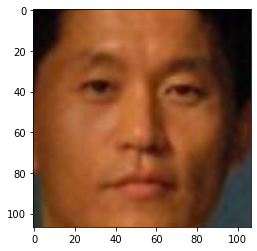

In [6]:
cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

In [84]:
def get_gropped_face_save(dir_path, path_to_save):
    file_list = os.listdir(dir_path)
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        pillow_image = Image.fromarray(face)
        pillow_image.save(path_to_save + '/' + os.path.splitext(file)[0] + '.' + 'jpg')

In [23]:
face = get_gropped_face(image_path)
pillow_image = Image.fromarray(face)
pillow_image.save(path_to_save + '/' + '이서진' + '.' + 'jpg')

[(192, 414, 415, 191)]


In [85]:
get_gropped_face_save(dir_path, path_to_save)

[(167, 304, 322, 150)]
[(80, 162, 155, 88)]
[(231, 438, 498, 171)]
[(118, 428, 304, 242)]
[(98, 366, 284, 180)]
[(56, 424, 146, 335)]
[(56, 414, 163, 306)]
[(150, 339, 305, 184)]
[(39, 153, 168, 24)]
[(46, 175, 136, 86)]
[(52, 676, 320, 409)]
[(66, 145, 156, 56)]
[(46, 218, 108, 156)]
[(139, 345, 325, 159)]
[(98, 236, 253, 81)]
[(44, 318, 152, 211)]
[(86, 135, 176, 46)]
[(333, 803, 718, 418)]
[(49, 118, 101, 66)]
[(66, 155, 156, 66)]
[(106, 145, 196, 56)]
[(82, 382, 211, 253)]
[(112, 438, 379, 171)]
[(669, 1311, 990, 990), (126, 365, 162, 329), (122, 1173, 158, 1137)]
[(98, 236, 253, 81)]
[(139, 345, 325, 159)]
[(72, 137, 146, 63)]
[(32, 170, 94, 107)]
[(77, 283, 263, 97)]
[(167, 563, 390, 340)]
[(76, 235, 166, 145)]
[(47, 179, 121, 104)]
[(56, 165, 146, 76)]
[(32, 114, 94, 52)]
[(80, 187, 155, 113)]
[(66, 225, 156, 135)]
[(206, 526, 527, 205)]
[(118, 414, 341, 191)]
[(76, 135, 166, 46)]
[(206, 526, 527, 205)]
[(56, 127, 163, 20)]
[(139, 345, 325, 159)]
[(171, 409, 439, 141)]
[(81, 390

# 얼굴 임베딩 추출

In [11]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [12]:
def get_face_embedding_dict(path_to_save):
    file_list = os.listdir(path_to_save)
    embedding_dict = {}
    for file in file_list:
        img_path = os.path.join(path_to_save, file)
        face = mpimg.imread(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
    return embedding_dict

In [13]:
embedding_dict = get_face_embedding_dict(path_to_save)

# 사진들과 비교

In [14]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [15]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [16]:
def get_nearest_face(name, top=4):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
#     print(len(sorted_faces))
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
    return sorted_faces, sort_key_func

In [17]:
sorted_faces, key = get_nearest_face('아빠', 5)

순위 1 : 이름(주진모(올드)), 거리(0.4278174506082518)
순위 2 : 이름(이희준), 거리(0.46178878455864936)
순위 3 : 이름(권태원), 거리(0.4731524799642276)
순위 4 : 이름(이동국), 거리(0.4748105724343611)
순위 5 : 이름(개코), 거리(0.4819958416334762)


# 시각화

연예인 닮은 꼴 찾기 1번째  결과 : 주진모(올드)
연예인 닮은 꼴 찾기 2번째  결과 : 이희준
연예인 닮은 꼴 찾기 3번째  결과 : 권태원
연예인 닮은 꼴 찾기 4번째  결과 : 이동국
연예인 닮은 꼴 찾기 5번째  결과 : 개코


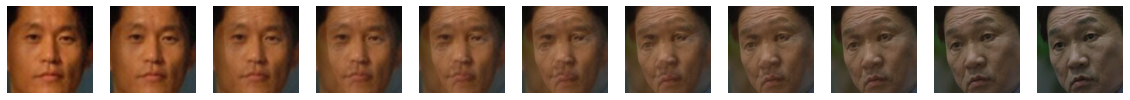

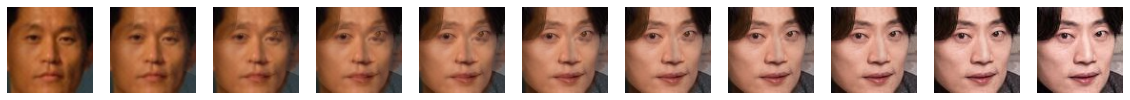

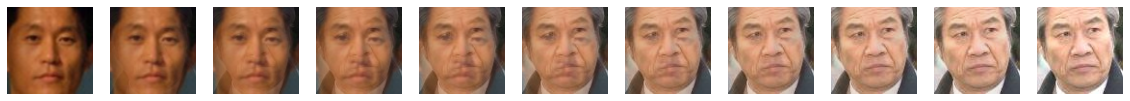

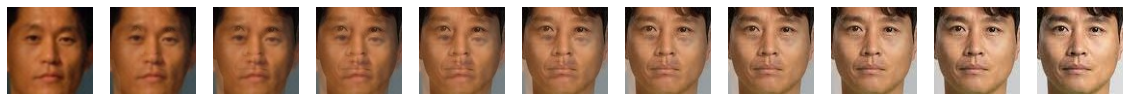

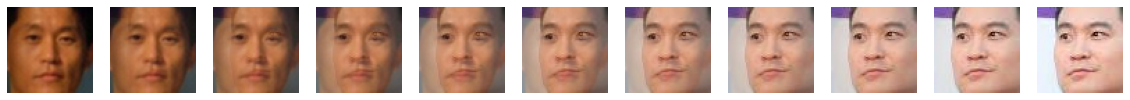

In [24]:
img2 = cv2.imread(path_to_save + '/아빠.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

for k in range(5):
    a = 0.0
    i = 0

    fig, axes = plt.subplots(1, 11, figsize=(20, 20))
    
    img1 = cv2.imread(path_to_save + '/' + sorted_faces[k+1][0] + '.jpg')
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    
    print('연예인 닮은 꼴 찾기 {}번째  결과 : {}'.format(k+1 , sorted_faces[k+1][0]))
    
    while(i < 11):
        # 블렌딩하는 두 이미지의 크기가 같아야함
        width = img1.shape[1]
        height = img1.shape[0]
        img2 = cv2.resize(img2, (width, height))

        # img1 사진은 점점 투명해지고 img2 사진은 점점 불투명해짐
        b = 1.0 - a
        dst1 = cv2.addWeighted(img1, a, img2, b, 0)
        axes[i].imshow(dst1)
        axes[i].axis('off')
        a = a + 0.1
        i = i +1